<a href="https://colab.research.google.com/github/kzeng4/Deep_learning/blob/Logistic-Regression/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HM1: Logistic Regression.

### Name: 


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [ ]:
# Load Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [ ]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.


data=data.drop(['id','Unnamed: 32'],axis=1).replace({'diagnosis':{'M':-1,'B':1}})
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           -1        17.99         10.38          122.80     1001.0   
1           -1        20.57         17.77          132.90     1326.0   
2           -1        19.69         21.25          130.00     1203.0   
3           -1        11.42         20.38           77.58      386.1   
4           -1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564         -1        21.56         22.39          142.00     1479.0   
565         -1        20.13         28.25          131.20     1261.0   
566         -1        16.60         28.08          108.30      858.1   
567         -1        20.60         29.33          140.10     1265.0   
568          1         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

## 1.3. Partition to training and testing sets

In [ ]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.

x_train, x_test, y_train, y_test = train_test_split(data.drop(['diagnosis'],axis=1),data['diagnosis'],test_size=0.2,random_state=50)


In [ ]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
345,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
107,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
361,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
353,15.08,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,...,18.51,33.22,121.20,1050.0,0.1660,0.2356,0.40290,0.15260,0.2654,0.09438


In [ ]:
y_train.shape

(455,)

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [ ]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).values.reshape(1, d)
sig = numpy.std(x_train, axis=0).values.reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean               -0.016452
texture_mean              -0.006475
perimeter_mean            -0.010339
area_mean                 -0.026655
smoothness_mean            0.058614
compactness_mean           0.056717
concavity_mean            -0.006780
concave points_mean        0.012189
symmetry_mean              0.117378
fractal_dimension_mean     0.022540
radius_se                  0.029754
texture_se                -0.072045
perimeter_se               0.057842
area_se                   -0.020637
smoothness_se             -0.020818
compactness_se            -0.006127
concavity_se              -0.007867
concave points_se          0.034431
symmetry_se                0.048284
fractal_dimension_se      -0.035465
radius_worst              -0.007602
texture_worst             -0.088374
perimeter_worst            0.001201
area_worst                -0.010722
smoothness_worst          -0.008194
compactness_worst          0.005816
concavity_worst           -0.020306
concave points_

In [ ]:
import numpy
d = x_train.shape[1]
numpy.mean(x_train, axis=0).values.reshape(1, d)

array([[1.41390352e+01, 1.92953187e+01, 9.20199560e+01, 6.56803516e+02,
        9.61928132e-02, 1.03729868e-01, 8.89096330e-02, 4.88225099e-02,
        1.80503736e-01, 6.27647912e-02, 4.03478462e-01, 1.22501231e+00,
        2.84190549e+00, 4.05344154e+01, 7.05393626e-03, 2.55006615e-02,
        3.19434086e-02, 1.17523297e-02, 2.04603429e-02, 3.81464462e-03,
        1.62765890e+01, 2.57884835e+01, 1.07253077e+02, 8.81811648e+02,
        1.32406769e-01, 2.54078769e-01, 2.73051976e-01, 1.14656332e-01,
        2.89854505e-01, 8.40200220e-02]])

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [ ]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
#clf = LogisticRegression(random_state=0).fit(x_train, y_train)

def objective(w, x, y, lam):
    
    
    n = x.shape[0]
    yx = numpy.multiply(y, x) #n-by-d
    yxw = numpy.dot(yx, w)#n-by-1
    vec = numpy.log(1+numpy.exp(-yxw))  #n-by-1
    reg = lam/2*(norm(w)**2) #scalar
    Q = numpy.mean(vec)+reg #scalar
    return Q
    pass


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [ ]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    
    n,d = x.shape
    yx = numpy.multiply(y, x) #n-by-d
    yxw = numpy.dot(yx, w)#n-by-1
    vec = numpy.divide(yx,1+numpy.exp(yxw))   #n-by-d
    reg = lam * w  #d-by-1
    gradient = -numpy.mean(vec,axis=0).reshape(d,1)+reg
    return gradient
    pass

In [ ]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(455,1)
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w=None, max_epoch=100):
    w=numpy.zeros((x.shape[1],1))
    objevals=[]
    for j in range(max_epoch):
        w -= learning_rate*gradient(w,x,y,lam)
        
        cost = objective(w, x, y, lam)
        objevals.append(cost)
        print("each epoch's objective value is" + str(cost))
    return w,objevals
    pass



Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [ ]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam=1E-6
w_optimal,loss=gradient_descent(x_train,y_train,0,0.1)

each epoch's objective value is0.5240065439423484
each epoch's objective value is0.43817830196882684
each epoch's objective value is0.38561143670246156
each epoch's objective value is0.34936630759665727
each epoch's objective value is0.3224695279113672
each epoch's objective value is0.30149362758380077
each epoch's objective value is0.28454000598407203
each epoch's objective value is0.2704639386495843
each epoch's objective value is0.25853011111153934
each epoch's objective value is0.2482423371272637
each epoch's objective value is0.2392522933649964
each epoch's objective value is0.23130738629794986
each epoch's objective value is0.22421939481896852
each epoch's objective value is0.21784478543352467
each epoch's objective value is0.21207190169959186
each epoch's objective value is0.20681236655845975
each epoch's objective value is0.20199515626464398
each epoch's objective value is0.19756241946965886
each epoch's objective value is0.19346646626253
each epoch's objective value is0.189667

In [ ]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_optimal_r,loss_r=gradient_descent(x_train,y_train,1E-4,0.1)

each epoch's objective value is0.5240075477182539
each epoch's objective value is0.4381822614709369
each epoch's objective value is0.3856186260921692
each epoch's objective value is0.3493767053553161
each epoch's objective value is0.3224830458964865
each epoch's objective value is0.30151016493401545
each epoch's objective value is0.2845594644214405
each epoch's objective value is0.27048622678326445
each epoch's objective value is0.25855514519331174
each epoch's objective value is0.24827004063207897
each epoch's objective value is0.23928259622698173
each epoch's objective value is0.2313402241037832
each epoch's objective value is0.22425470806501438
each epoch's objective value is0.2178825188777189
each epoch's objective value is0.21211200380988943
each epoch's objective value is0.20685478904902366
each epoch's objective value is0.20203985370788433
each epoch's objective value is0.1976093489722009
each epoch's objective value is0.19351558719429462
each epoch's objective value is0.1897188

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [ ]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    #define objective function Q(i)
    yx = yi * xi #1-by-d
    yxw = float(numpy.dot(yx, w))#scalar

    vec = numpy.log(1+numpy.exp(-yxw))  #scalar
    reg = lam / 2 *(norm(w)**2) #scalar
    Q_i = vec + reg #scalar
    #stochastic gradient at w
    g_i = -yx.reshape(len(xi),1) / (1+numpy.exp(yxw)) + lam * w# d-by-1

    return Q_i, g_i
    
    pass


Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [ ]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w=None, max_epoch=100):
    
    n,d = numpy.shape(x)
    objective=[]
    w = numpy.zeros((d, 1)) # zero initialization
    #epoch
    for i in range(max_epoch):
        
        #random permute samples
        index = numpy.random.permutation(n)
        x_random=x[index,:]#n-by-d
        y_random=y[index,:]#n-by-1
        #iteration in each epoch
        Q=0
        for j in range(n):
            Q_i, gradient = stochastic_objective_gradient(w, x_random[j,:], y_random[j,:], lam)
            Q += Q_i
            w -= learning_rate*gradient#d-by-1
        learning_rate *= 0.9
        objvals = Q/n
        print("each epoch's objective value is" + str(objvals))
        
        objective.append(objvals)
    return w,objective
    pass

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [ ]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 0.01
w,objective = sgd(x_train, y_train, lam, learning_rate)

each epoch's objective value is0.2239275855858968
each epoch's objective value is0.12635363687913936
each epoch's objective value is0.10880935141552059
each epoch's objective value is0.10048562095009257
each epoch's objective value is0.09522160068233282
each epoch's objective value is0.09175034173485319
each epoch's objective value is0.08913614370004377
each epoch's objective value is0.08713901054753823
each epoch's objective value is0.085573939873688
each epoch's objective value is0.08430566956012929
each epoch's objective value is0.08325625758978625
each epoch's objective value is0.08238759769517978
each epoch's objective value is0.08164254848688816
each epoch's objective value is0.08102034867260553
each epoch's objective value is0.08048495061750245
each epoch's objective value is0.08001506928719285
each epoch's objective value is0.079615126510477
each epoch's objective value is0.07926340933167138
each epoch's objective value is0.07895557829830542
each epoch's objective value is0.078

In [ ]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.01
learning_rate = 0.1
w,objective = sgd(x_train, y_train, lam, learning_rate)

each epoch's objective value is0.1440948216057757
each epoch's objective value is0.11693102745519593
each epoch's objective value is0.11571042851409005
each epoch's objective value is0.11303345199892856
each epoch's objective value is0.11300302053019005
each epoch's objective value is0.11476547886113797
each epoch's objective value is0.11171241369126807
each epoch's objective value is0.11221644634611348
each epoch's objective value is0.11070390853269668
each epoch's objective value is0.11063903132392738
each epoch's objective value is0.10975345971240842
each epoch's objective value is0.10987707047323282
each epoch's objective value is0.10956478073513394
each epoch's objective value is0.10892280086467006
each epoch's objective value is0.10881603133783302
each epoch's objective value is0.1083100493746195
each epoch's objective value is0.10835165792109254
each epoch's objective value is0.10820326932392367
each epoch's objective value is0.10797567308362105
each epoch's objective value is0.

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [ ]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    yx = numpy.multiply(yi,xi) #b-by-d 
    func0 = numpy.log(1+numpy.exp(-numpy.dot(yx,w))) #b-by-1
    func0_mean = numpy.mean(func0,axis = 0)#scalar
    Q_I = func0_mean + lam/2*(norm(w))**2#scalar
    func1 = numpy.divide(-yx, 1+numpy.exp(numpy.dot(yx,w)))# b-by-d
    g_I = numpy.mean(func1,axis=0).reshape(d,1) + lam * w # d-by-1
    return Q_I, g_I
    pass

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [ ]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    n,d = numpy.shape(x)
    objvals=[]
    w = numpy.zeros((d, 1))#initialization of w
    b = 32 #set the value of b
    #epoch
    for i in range(max_epoch):
        Q = 0
        #random permute samples
        index = numpy.random.permutation(n)
        x_random=x[index,:]#n-by-d
        y_random=y[index,:]#n-by-1
        if n % d != 0:
            iter = int((n - (n%b))/b + 1)
        else:
            iter = int(n/b)
        for j in range(iter):
            if j < iter:
                Q_I,g_I = mb_objective_gradient(w,x[b*j:b*(j+1),:],y[b*j:b*(j+1),:],lam)
            else:
                Q_I,g_I = mb_objective_gradient(w,x[b*j:n,:],y[b*j:n,:],lam)
            Q += Q_I
            w -= learning_rate*g_I
        objval=Q/iter
        print("each epoch's objective value is" + str(objval))
        objvals.append(objval)
        learning_rate *= 0.9
    return w, objvals
    pass

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [ ]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 0.1
w,obj=mbgd(x_train, y_train, lam, learning_rate, w=None, max_epoch=100)

each epoch's objective value is[0.33012411]
each epoch's objective value is[0.18277917]
each epoch's objective value is[0.15139856]
each epoch's objective value is[0.13592858]
each epoch's objective value is[0.12652941]
each epoch's objective value is[0.12016517]
each epoch's objective value is[0.11555875]
each epoch's objective value is[0.11207102]
each epoch's objective value is[0.10934358]
each epoch's objective value is[0.10715844]
each epoch's objective value is[0.10537472]
each epoch's objective value is[0.10389696]
each epoch's objective value is[0.10265794]
each epoch's objective value is[0.10160886]
each epoch's objective value is[0.10071334]
each epoch's objective value is[0.09994367]
each epoch's objective value is[0.09927832]
each epoch's objective value is[0.09870031]
each epoch's objective value is[0.09819604]
each epoch's objective value is[0.0977545]
each epoch's objective value is[0.09736665]
each epoch's objective value is[0.09702501]
each epoch's objective value is[0

In [ ]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.01
learning_rate = 0.1
mbgd(x_train, y_train, lam, learning_rate, w=None, max_epoch=100)

each epoch's objective value is[0.33200064]
each epoch's objective value is[0.18811835]
each epoch's objective value is[0.15911575]
each epoch's objective value is[0.14543229]
each epoch's objective value is[0.13744215]
each epoch's objective value is[0.13222266]
each epoch's objective value is[0.12856499]
each epoch's objective value is[0.12587496]
each epoch's objective value is[0.12382554]
each epoch's objective value is[0.12222162]
each epoch's objective value is[0.12093957]
each epoch's objective value is[0.11989726]
each epoch's objective value is[0.11903798]
each epoch's objective value is[0.11832137]
each epoch's objective value is[0.11771791]
each epoch's objective value is[0.11720554]
each epoch's objective value is[0.11676743]
each epoch's objective value is[0.11639055]
each epoch's objective value is[0.11606463]
each epoch's objective value is[0.1157815]
each epoch's objective value is[0.11553455]
each epoch's objective value is[0.11531842]
each epoch's objective value is[0

(array([[-0.40971541],
        [-0.36708672],
        [-0.40577701],
        [-0.40885301],
        [-0.13541838],
        [-0.15187571],
        [-0.32252353],
        [-0.42589656],
        [-0.14161975],
        [ 0.16566637],
        [-0.35264837],
        [ 0.00785426],
        [-0.29536483],
        [-0.32518716],
        [ 0.00203704],
        [ 0.12579192],
        [ 0.09844021],
        [-0.04694441],
        [ 0.0478326 ],
        [ 0.17069324],
        [-0.50544755],
        [-0.46128   ],
        [-0.47780655],
        [-0.48034508],
        [-0.32651608],
        [-0.22383052],
        [-0.31017743],
        [-0.4546639 ],
        [-0.33828975],
        [-0.14093926]]),
 [array([0.33200064]),
  array([0.18811835]),
  array([0.15911575]),
  array([0.14543229]),
  array([0.13744215]),
  array([0.13222266]),
  array([0.12856499]),
  array([0.12587496]),
  array([0.12382554]),
  array([0.12222162]),
  array([0.12093957]),
  array([0.11989726]),
  array([0.11903798]),
  array([

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

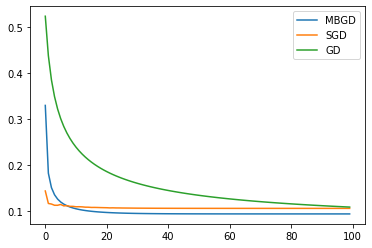

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(obj)), obj, label = "MBGD")
plt.plot(range(len(objective)),objective, label = "SGD")
plt.plot(range(len(loss_r)), loss_r, label = "GD")
plt.legend()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [ ]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    f = numpy.sign(numpy.dot(X, w))
    return f
    pass

In [ ]:
# evaluate training error of logistric regression and regularized version

from sklearn.metrics import accuracy_score
y_pred1 = predict(w_optimal, x_train)
acc1 = accuracy_score(y_train, y_pred1)
y_pred2 = predict(w_optimal_r, x_train)
acc2 = accuracy_score(y_train, y_pred2)
print("The training error of logistric regression is:"+str(1-acc1)+"\n""The accuracy of logistric regression is:"+str(acc1))
print("The training error of regularized logistric regression is:"+str(1-acc2)+"\n""The accuracy of regularized logistric regression is:"+str(acc2))

The training error of logistric regression is:0.02637362637362639
The accuracy of logistric regression is:0.9736263736263736
The training error of regularized logistric regression is:0.02637362637362639
The accuracy of regularized logistric regression is:0.9736263736263736


In [ ]:
# evaluate testing error of logistric regression and regularized version
f1_test = predict(w_optimal, x_test)
acc1_test = accuracy_score(y_test, f1_test)
f2_test = predict(w_optimal_r, x_test)
acc2_test = accuracy_score(y_test, f2_test)
print("The training error of logistric regression is:"+str(1-acc1_test)+"\n""The accuracy of logistric regression is:"+str(acc1_test))
print("The training error of regularized logistric regression is:"+str(1-acc2_test)+"\n""The accuracy of regularized logistric regression is:"+str(acc2_test))

The training error of logistric regression is:0.03508771929824561
The accuracy of logistric regression is:0.9649122807017544
The training error of regularized logistric regression is:0.03508771929824561
The accuracy of regularized logistric regression is:0.9649122807017544


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [ ]:
#for GD, set the lam as 0.1 and learning_rate as 0.1
w_optimal_r1,loss_r1=gradient_descent(x_train,y_train,0.1,0.1)
y_pred3 = predict(w_optimal_r1, x_train)
acc3 = accuracy_score(y_train, y_pred3)
y_pred3_test = predict(w_optimal_r1, x_test)
acc3_test = accuracy_score(y_test, y_pred3_test)
print(acc3,acc3_test)
# training_accuracy = 0.5956043956043956; test_accuracy = 0.5789473684210527

each epoch's objective value is0.5250103198478463
each epoch's objective value is0.44210595963838306
each epoch's objective value is0.39269160402225467
each epoch's objective value is0.3595360386254994
each epoch's objective value is0.3356031963875347
each epoch's objective value is0.3174560414753522
each epoch's objective value is0.30320111516678966
each epoch's objective value is0.29170272030807753
each epoch's objective value is0.28223502519881777
each epoch's objective value is0.27431068491553096
each epoch's objective value is0.26758928432310347
each epoch's objective value is0.26182519917933333
each epoch's objective value is0.25683632879675444
each epoch's objective value is0.2524845250536895
each epoch's objective value is0.2486628923777241
each epoch's objective value is0.2452872881365614
each epoch's objective value is0.24229048007159176
each epoch's objective value is0.2396180350244165
each epoch's objective value is0.2372253654073451
each epoch's objective value is0.2350755

In [ ]:
#for SGD, set the lam as 0.1 and learning_rate as 0.01
w_optimal_r2,loss_r2=sgd(x_train,y_train,0.1,0.01, w=None)
y_pred4 = predict(w_optimal_r2, x_train)
acc4 = accuracy_score(y_train, y_pred4)
y_pred4_test = predict(w_optimal_r2, x_test)
acc4_test = accuracy_score(y_test, y_pred4_test)
print(acc4,acc4_test) 

each epoch's objective value is0.26786501984259103
each epoch's objective value is0.21397760388629714
each epoch's objective value is0.2126558851503678
each epoch's objective value is0.21218616584496755
each epoch's objective value is0.21176896560193723
each epoch's objective value is0.21169675581323885
each epoch's objective value is0.2117069904308007
each epoch's objective value is0.21141742222387644
each epoch's objective value is0.21145648710303855
each epoch's objective value is0.2113014318497886
each epoch's objective value is0.21116646230330147
each epoch's objective value is0.21115705892804085
each epoch's objective value is0.21099384387324377
each epoch's objective value is0.21102441911650968
each epoch's objective value is0.21091346463544805
each epoch's objective value is0.2108904774020609
each epoch's objective value is0.21084829300920296
each epoch's objective value is0.2107934115736217
each epoch's objective value is0.21075230748803214
each epoch's objective value is0.210

In [ ]:
#for MBGD, set the lam as 0 and learning_rate as 0.01
w_optimal_r2,loss_r2=mbgd(x_train,y_train,0.1,0.01, w=None)
y_pred4 = predict(w_optimal_r2, x_train)
acc4 = accuracy_score(y_train, y_pred4)
y_pred4_test = predict(w_optimal_r2, x_test)
acc4_test = accuracy_score(y_test, y_pred4_test)
print(acc4,acc4_test) 
# accuracy = 0.5956043956043956

each epoch's objective value is[0.58557086]
each epoch's objective value is[0.45184154]
each epoch's objective value is[0.38960652]
each epoch's objective value is[0.35367313]
each epoch's objective value is[0.33034934]
each epoch's objective value is[0.31406466]
each epoch's objective value is[0.30211392]
each epoch's objective value is[0.29302097]
each epoch's objective value is[0.28591051]
each epoch's objective value is[0.28023016]
each epoch's objective value is[0.27561392]
each epoch's objective value is[0.27180968]
each epoch's objective value is[0.26863809]
each epoch's objective value is[0.26596814]
each epoch's objective value is[0.26370188]
each epoch's objective value is[0.26176471]
each epoch's objective value is[0.26009877]
each epoch's objective value is[0.25865855]
each epoch's objective value is[0.25740777]
each epoch's objective value is[0.25631717]
each epoch's objective value is[0.25536292]
each epoch's objective value is[0.25452538]
each epoch's objective value is[